# Изучение закономерностей, определяющих успешность игр

### Ход исследования:
1. [Обзор данных.](#start)
2. [Предобработка данных.](#preprocessing)
3. [Проведение анализа выпуска игр в те или иные годы и определение актуального периода ждля последующего анализа.](#year_stat)
4. [Проведение анализа продаж игр в зависимости от платформы.](#game_sales)
5. [Проведение анализа игр в зависимости от жанра.](#game_genre)
6. [Составление портрета пользователя в каждом регионе.](#user_portrait)
7. [Проверка гипотез:](#hypothesis)
- cредние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- cредние пользовательские рейтинги жанров Action и Sports разные.
8. [Общий вывод.](#conclusion)

### Изучение общей информации
<a id="start"></a> 

In [1]:
#вызываем функцию игнорирования предупреждений
import warnings
warnings.filterwarnings('ignore')

#импортируем библиотеку pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

#устанавливаем, чтобы все числа по умолчанию были с 2-мя знаками после запятой
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#открываем файл с данными
try:
    df = pd.read_csv('C:/Users/vladi/...', sep=',')
except:
    df = pd.read_csv('https://...', sep=',')
    
#выведем первые 20 строк нашего датасета
df.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#изучим общую информацию о файле
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#выведем долю пропусков в %
pd.DataFrame(round(df.isna().mean()*100)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


В целом данные выглядят неплохо. Пропусков почти нет кроме данных с оценками и рейтингом, но нам их заполнить нечем, т.к. выведенные средние значения будут ошибочными и могут сильно исказить реальную картину. При этом и удалять строки с пропущенными данными в этих колонках мы не будем, т.к. это слишком большая потеря данных. Данных по рейтингу и оценкам вполне достаточно, чтобы в дальнейшем составить общую картину.

Также потребуется изменить типы данных в таких столбцах, как "Год выпуска" (на int - пояснения почему не datetime будут ниже), "Оценка критиков" (судя по всему на целочисленные - int) и "Оценка пользователей" (на float).

### Предобработка данных
<a id="preprocessing"></a> 

#### Приведем названия столбцов нашего датафрейма к нижнему регистру:

In [5]:
#приводим названия столбцов DF к нижнему регистру
df.columns = df.columns.str.lower()

#выведем для проверки полученного результата первые 5 строк DF
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Посмотрим, что за 2 пропущенных значения в столбце с названием игры:

In [6]:
df.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Как видим, восстановить название по косвенным параметрам не представляется возможным. Кроме того, ранее при описании датасета в столбце с жанром игры было также выявлено 2 пропущенных значения, которые тоже отображены в полученной выше таблице.

Чтобы эти пропущенные данные не мешали - удалим 2 эти строки:

In [7]:
#удалим строки, в которых пропущены значения в столбце name и сразу же пронумеруем строки (индексы) датафрейма заново:
df = df.dropna(subset = ['name']).reset_index(drop=True)

#выведем обновленную информацию о DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Изменение типов данных столбцов

Сперва заменим тип данных в столбце "year_of_release" с float на int. Хоть это и дата, но так нам будет удобнее ориентироваться в годах (без лишней информации ввиде 1-го числа 1-го месяца). При этом все пропущенные значения заменим на "0":

In [8]:
#преобразуем тип данных столбца year_of_release из float в int предварительно заменив NaN на 0
df['year_of_release'] = df['year_of_release'].fillna(0).astype('int')

Готово.

Далее хотели сделать замену типа данных в столбце "critic_score" с float на int. Сперва проверим, точно ли все значения целочисленные:

In [9]:
#выведем все уникальные значения столбца critic_score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Как видим все значения целочисленные. Значит тип данных равен float потому, что есть пропуски, но они нам не мешают, а заменить мы их ничем не можем, в том числе не можем заменить "заглушками", т.к. они могут исказить значения при дальнейшем анализе. Нулями заполнять тоже некорректно, т.к. тоже приведет к искажению данных.

Аналогично проанализируем "user_score". Сперва выведем все уникальные значения данного столбца:

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Изучив полученные данные видим, что помимо чисел с плавающей точкой и пропущенных значений имеются также данные со значениями "tbd". 

Исходя из информации, полученной на просторах интеренета, данная аббревиатура означает не что иное как "to be determined" - "Подлежит определению". Т.е. по ряду игр оценка пользователями еще не определена. Возможно, в тех или иных анализах рейтинга, мы не будем использовать строки с указанным значения рейтинга, т.к. по идее он просто отсутствует. Но нулями заменять тоже неверно, т.к. это исказит средние значения и другие данные при последующем анализе (пропущенные значения не заполняем нулями по тем же причинам).

Также мы не можем тут поставить "заглушки" в виде цифр на пропущенные значения, т.к. при проверке гипотез они могут сильно исказить данные.

Поэтому оставим в данном столбце все как есть, не будем менять тип данных.

Сделаем проверку, все ли типы данных, которые мы преобразовали поменялись:

In [11]:
#выведем обновленную информацию о DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


#### Сделаем проверку на полные (явные) дубликаты:

In [12]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют.

#### Создадим столбец с суммарными продажами по всем регионам.

Для этого сложим продажи в Северной Америке, Европе, Японии и других странах:

In [13]:
#создадим в df столбец total_sales, сложив столбцы na_sales, eu_sales, jp_sales и other_sales
#где sum(axis = True) - суммирование по строкам
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = True)

#выведем первые 5 строк полуившегося столбца для проверки
df['total_sales'].head()

0   82.54
1   40.24
2   35.52
3   32.77
4   31.38
Name: total_sales, dtype: float64

### Исследовательский анализ данных

#### Посмотрим сколько игр выпускалось в те или иные годы:
<a id="year_stat"></a> 

Построим линенйный график распределения объема выпускаемых игр по годам:

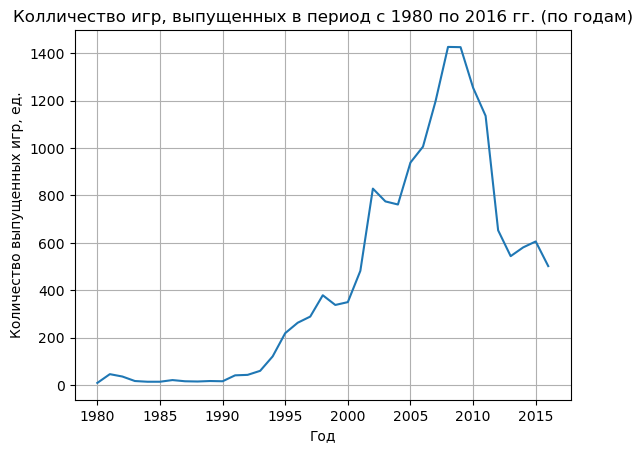

In [14]:
#построим линейный график по количеству выпущенных игр в разные годы
df[df['year_of_release']!=0].groupby('year_of_release')['year_of_release'].count().plot(
    title = 'Колличество игр, выпущенных в период с 1980 по 2016 гг. (по годам)',
    xlabel = 'Год',
    ylabel = 'Количество выпущенных игр, ед.',
    grid = True
);

**Выводы:** 

Видим, что пик выпуска игр приходится на 2008 и 2009 гг. (свыше 1 400 игр в каждом указанном году).

C 1980 по 1993 гг. был затяжной период выпуска небольшого количества игр - меньше 20 ед. ежегодно.

Начиная с 1994 г. количество выпущенных игр стало превышать 100 ед. в год и далее пошло по нарастающей ежегодно. Возможно, указанный рост обусловлен также сбором более полных данных, т.к. обмен информацией из года в год развивался.

После пика в 2008 и 2009 гг. на 2010 г. приходится спад по выпуску игр, который продолжается и в последующие годы. Можно отметить, что начиная с 2012 г. выпуск игр стабилизируется и варьируется в районе 600 ед. в год.

Для определения факторов успешности игр наиболее актуальным является период, как раз начиная с 2012 г.

Также стоит отметить, что в "нулевой" год ранее мы поместили все те данные, в которых не был указан год.

#### Посмотрим как платформы распределяются по количеству продаж.
<a id="game_sales"></a> 

In [15]:
#построим сводную таблицу (pivot_table) по кол-ву проданных копий игр на каждой из платформ и отсортируем их в порядке убывания
df.pivot_table(
    index = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
).sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Наблюдается резкий скачок в сторону спада по количеству продаж, начиная с 317 млн ед. Перед этим количество проданных копий варьировало от 730 до 1 255 млн ед.

К наиболее успешным игровым платформам по количеству проданных копий игр можно причислить все те, которые расположены выше значения 317 млн ед. (до резкого спада проданных копий), таких платформ 6:  PS2, X360, PS3, Wii, DS, PS.


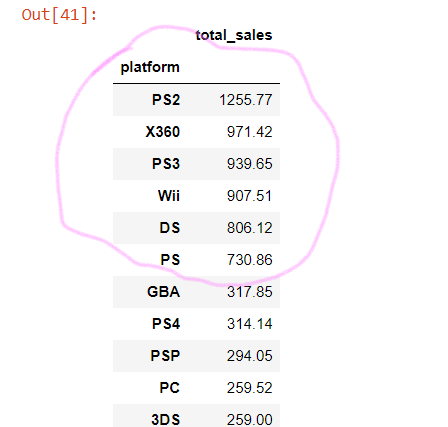

Построим на графиках как распределялись продажи по выявленным выше платформам:

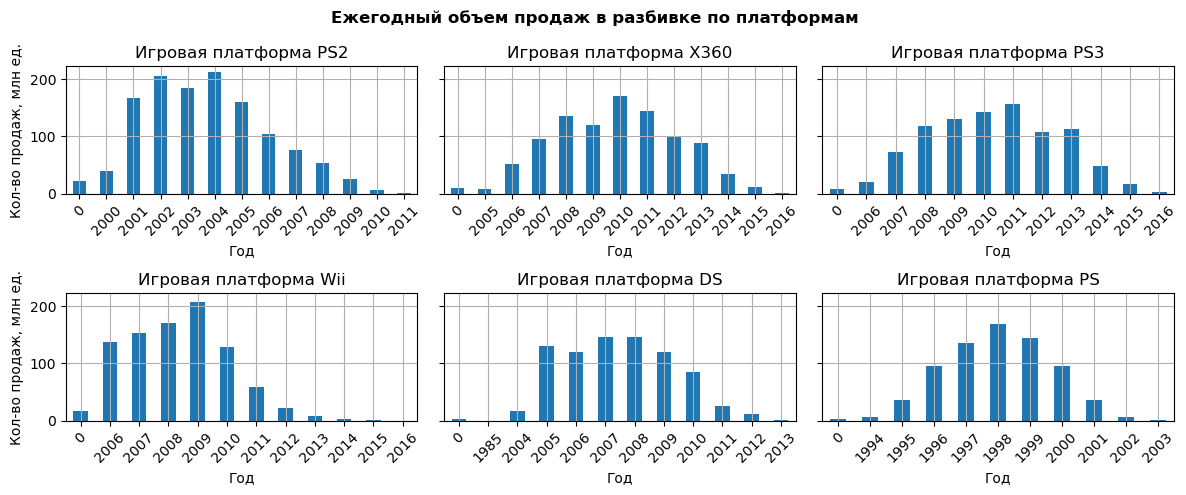

In [16]:
#создаем список платформ для которых будет строиться диаграмма
platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

#создаем фигуру и подграфики в ряд
fig, axs = plt.subplots(2, len(platforms)//2, figsize=(12, 5), sharey=True)
axs = axs.flatten() #преобразуем двумерный массив axs в одномерный

#создадим цикл, который пройдется по каждой заданной платформе и отобразит в столбчатых диаграммах распредление продаж по годам
for i, platform in enumerate(platforms):
    df[df['platform'] == platform].pivot_table(
        index='year_of_release',
        values='total_sales',
        aggfunc='sum'
    ).plot(
        kind='bar',
        grid=True,    
        title=f'Игровая платформа {platform}',
        xlabel='Год',
        ylabel='Кол-во продаж, млн ед.',
        rot=45,
        ax=axs[i],
        legend=False
    )

#задаем общее название графикам
fig.suptitle('Ежегодный объем продаж в разбивке по платформам', fontweight='bold')    
    
#автоматически отрегулируем расположение графиков для лучшей читаемости
plt.tight_layout();

**Выводы:**

Исследовав графики, можно заключить следующее: характерное количество лет существования платформ находится в диапазоне от 10 до 12 лет.

Причем в "жизненном цикле" каждой из платформ отчетливо можно наблюдать пик роста, который, как правило, приходится на середину периода. Также стоит отметить, что характерынй объем продаж на пике составляет от 150 до 200 млн ед. проданных копий.

#### Дальнейшее исследование будем проводить в актуальном периоде.

За актуальный период (как ранее описывали в п. 7.1) возьмем данные, начиная с 2012 г. по 2016 г.

*Отметим, что для целей прогнозирования продаж на следующий год даже в традиционных моделях бизнеса редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно будут захвачены уже отжившие тренды, которые зависят не только от выхода новой игровой платформы.
В данном случае идеальным периодом будет 2014-2016 гг./2015-2016 гг - т.е. период в 2-3 года с сохранением данных за 2016 г.
Но мы рассмотрим больший период, чтобы увидеть как именно развивались продажи с момента их сильного спада.*

Создадим отдельный датафрейм для дальнейших ислледований:

In [17]:
#сделаем срез df по годам, оставив только >= 2012 г. и сохраним в переменную df_actual
df_actual = df[df['year_of_release'] >= 2012].reset_index(drop = True)

#выведем первые 5 строк полученного датафрейма
df_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.3,M,13.79


Выведем информацию о полученном датасете:

In [18]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int32  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1663 non-null   object 
 10  rating           1611 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(6), int32(1), object(5)
memory usage: 259.4+ KB


Количество оставшихся строк в датафрейме за актуальный период составляет 2 886 из 16 713 изначального датафрейма. Пропущенные значения по-прежнему наблюдаются в столбцах с оценкой пользователей и рейтинге.

Посмотрим продажи по каждой платформе в актуальном периоде, расположив их в порядке убывания:

In [19]:
#построим сводную таблицу (pivot_table) по кол-ву проданных копий игр на каждой из платформ в актуальном периоде (df_actual)
#и отсортируем их в порядке убывания
df_actual.pivot_table(
    index = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
).sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


Из 31 платформы общего датафрейма в акутальном периоде осталось 11. По-прежнему, как и в общем датафрейме лидируют платформы фирмы PS только более нового поколения, а также X360. Причем в предыдущем анализе мы видели, что на платформах PS3 и X360 их "жизненный цикл" подходил к завершению.

Посмотрим на каком этапе жизненного цикла находится каждая из платформ актуального периода:

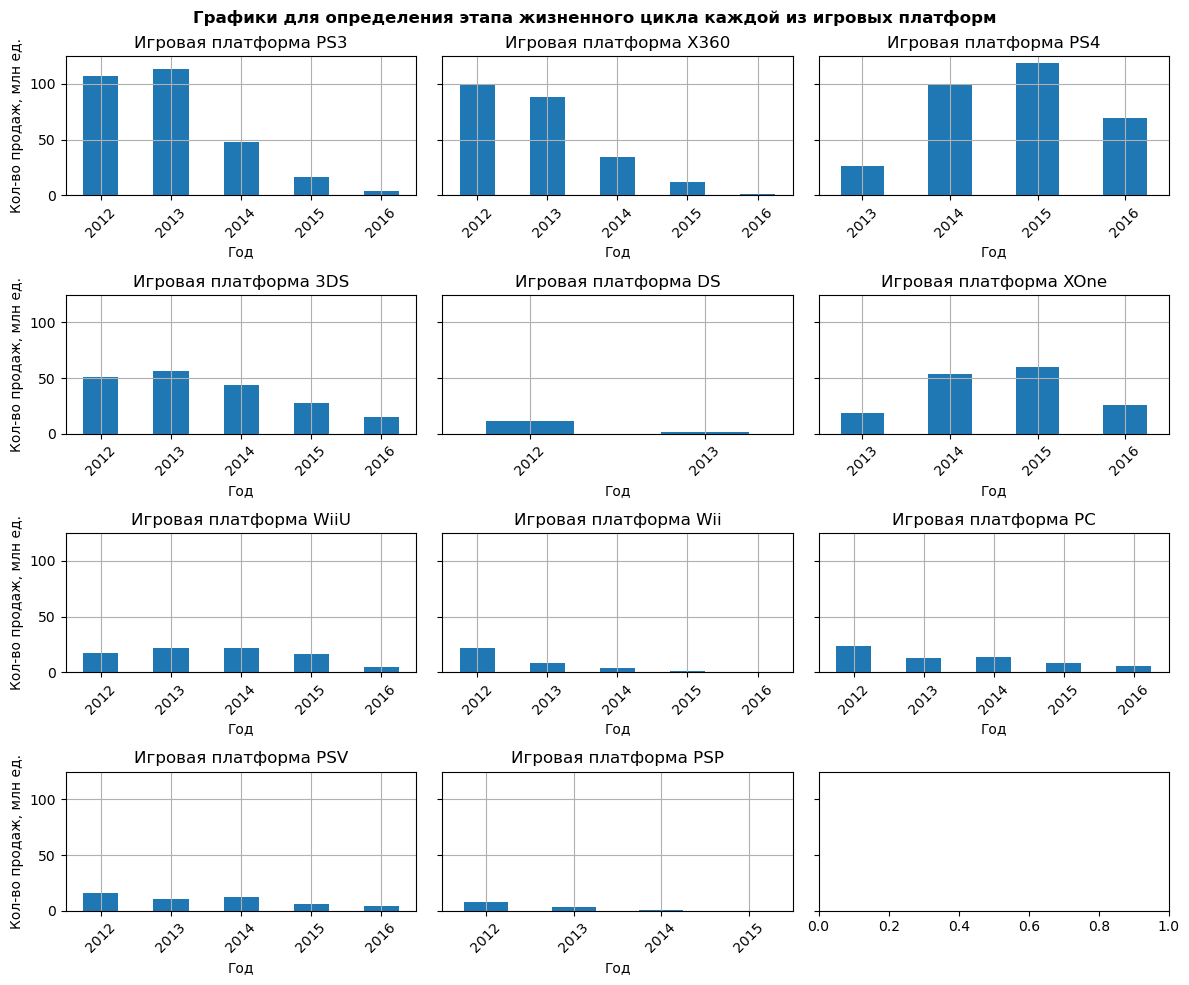

In [20]:
#создаем фигуру и подграфики в ряд
fig, axs = plt.subplots(4, 3, figsize=(12, 10), sharey=True)
axs=axs.flatten()  #преобразуем двумерный массив axs в одномерный

#создадим цикл, который пройдется по каждой заданной платформе актуального периода
#и отобразит в столбчатых диаграммах распредление продаж по годам
for i, platform in enumerate(df_actual['platform'].unique()):
    df_actual[df_actual['platform'] == platform].pivot_table(
    index = 'year_of_release',
    values = 'total_sales',
    aggfunc = 'sum'
).plot(
    kind = 'bar',
    grid = True,    
    title = f'Игровая платформа {platform}',
    xlabel = 'Год',
    ylabel = 'Кол-во продаж, млн ед.',
    rot = 45,
    legend = False,
    ax = axs[i]
)
    
#задаем общее название графикам
fig.suptitle('Графики для определения этапа жизненного цикла каждой из игровых платформ', fontweight='bold')

#автоматически отрегулируем расположение графиков для лучшей читаемости
plt.tight_layout();

**Выводы:**

Учитывая тот фактор, что данные за 2016 год могут быть неполными (см. раздел 4 "Описание данных") платформы, на которые стоит сделать ставку по успешности в прогнозируемом периоде (2017 г. и, возможно, несколько последующих лет) - **PS4 и XOne**.

Если посмотреть на их графики, то, начиная с момента анализа этих платформ (2013 г.), ежегодно прослеживается четкая динамика роста продаж. в 2015 году в PS4 объем продаж уже составляет болше 100 млн ед. проданных копий, а у XOne - около 60 млн ед. Как мы помним из анализа выше - объем продаж на пике находится в районе 150 - 200 млн ед. проданных копий.

По остальным платформам виден только спад продаж, но даже из них можно выбрать несколько платформ, которые будут еще на плаву пару лет или по крайней мере точно 1 год (2017 г.). К таким платформам относятся: **3DS, WiiU, PC и PSV**.

Оставшиеся палтформы явно пришли к концу периода их "жизненного цикла" и на них лучше не делать ставки.

#### Построим для выделенных перспективных плафторм графики "ящик с усами":

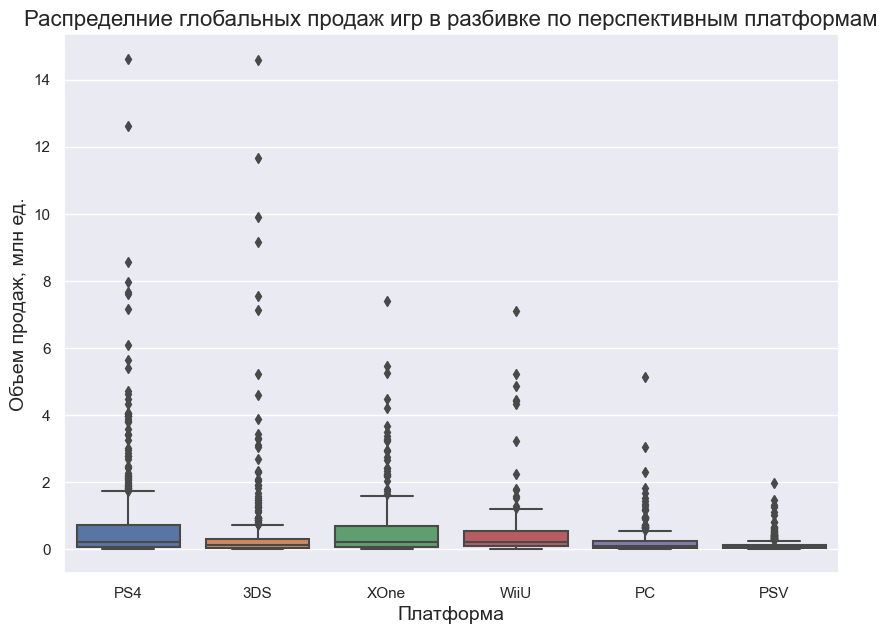

In [21]:
#поместим все выявленные перспективные платформы в отельную переменную perspective
perspective = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']

#зададим размер графика, где 10 - это width, 7 - height
sns.set(rc = {'figure.figsize':(10 , 7)})

#построим boxplots для каждого значения из переменной perspective по total_sales
boxplots = sns.boxplot(
    data = df_actual.query('platform == @perspective'),
    x = 'platform',
    y = 'total_sales',
    orient = 'v'
);

#зададим наименование полученного графика (boxplots.axes.set_title) и подписи осей (boxplots.set_xlabel, boxplots.set_ylabel) 
boxplots.axes.set_title("Распределние глобальных продаж игр в разбивке по перспективным платформам", fontsize=16)
boxplots.set_xlabel("Платформа", fontsize=14)
boxplots.set_ylabel("Объем продаж, млн ед.", fontsize=14);

У каждой платформы выбросы достигают разных значений, из-за этого график неочень нагляден, но все же большая часть сосредоточена около 3 млн ед. проданных копий. Для улучшения наглядности построим "ящики с усами" для каждой из выбранных платформ с учетом этого фактора и ограничим продажи до 3 млн ед. включительно. Заодно выведем описание каждого из полученных распределений:

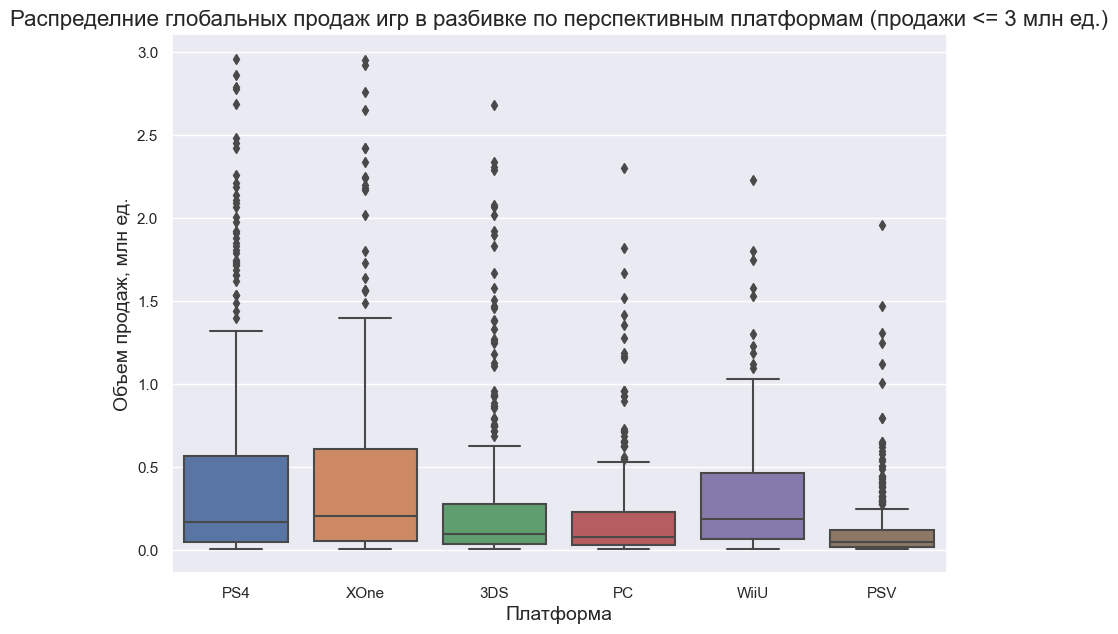

In [22]:
#построим boxplots для каждого значения из переменной perspective по total_sales <= 3
boxplots = sns.boxplot(
    data = df_actual.query('platform == @perspective & total_sales <= 3'),
    x = 'platform',
    y = 'total_sales',
    orient = 'v'
);

#зададим наименование нового полученного графика (boxplots.axes.set_title)
#и подписи осей (boxplots.set_xlabel, boxplots.set_ylabel) 
boxplots.axes.set_title(
    "Распределние глобальных продаж игр в разбивке по перспективным платформам (продажи <= 3 млн ед.)",
    fontsize=16)
boxplots.set_xlabel("Платформа", fontsize=14)
boxplots.set_ylabel("Объем продаж, млн ед.", fontsize=14);

In [23]:
#выведем описание полученных распределений по каждой из платформ
df_actual.query('platform == @perspective').groupby(['platform'])['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,396.00,0.49,1.39,0.01,0.04,0.11,0.31,14.60
PC,250.00,0.25,0.49,0.01,0.03,0.08,0.24,5.14
PS4,392.00,0.80,1.61,0.01,0.06,0.20,0.73,14.63
PSV,411.00,0.12,0.20,0.01,0.02,0.05,0.12,1.96
WiiU,147.00,0.56,1.06,0.01,0.08,0.22,0.53,7.09
XOne,247.00,0.65,1.04,0.01,0.06,0.22,0.69,7.39


Несмотря на то, что по объему продаж лидировал PS4, более высокое среднее значение (медианное) объема продаж у платформ XOne и WiiU (по 0,22 млн ед. проданных копий, у PS4 - 0,2).

Уровень стандартного отклонения у PS4 тоже высокий по сравнению с XOne и WiiU и составляет 1,61, в то время как у XOne и WiiU - 1,04 и 1,06 соответственно. Это обусловлено тем, что у PS4 имеются выбросы - когда объемы продаж той или иной игры составляли в единичных случаях более 8 млн ед. копий.

Еще любопытно, что у WiiU не так много выпущено игр за данный период, меншего из рассматриваемого перечня платформ, но средний уровень продаж тем не менее у него высокий и, как мы ранее отмечали, составляет 0,22 млн ед. копий.

Платформы 3DS и PSV за период с 2012 по 2016 гг. выпустили больше всего игр среди прочих платформ: 396 и 411 соответственно - эти 2 платформы лидеры по количеству выпущенных игр за заданный период среди перспективных платформ (например, у того же PS4 количество выпущенных игр составляет 392 ед.). Но, тем не менее, медианные значения продаж той или иной игры, выпущенных на данных платформах, являются одними из минимальными среди рассматриваемых, и составляют 0,11 и 0,05 млн ед. соотвественно.

Также тут стоит отметить, что у платформы PSV самое низкий разброс значений среди рассматриваемых платформ (стандартное отклонение составляет 0,2), а у 3DS - наоборот, он довольно высокий, почти как у PS4, стандартное отклонение равно 1,39.

У игровой платформы PC медианное значение продаж невилико и составляет 0,08 млн ед., количество выпущенных игр тоже небольшое и составляет 250. При этом если сравнивать средние объемы продаж со значениями платформы XOne (т.к. количество выпущенных игр у них приблизительно одинаковое, у XOne составляет 247 ед.), то можно сделать вывод, что игры на XOne продаются активнее. Но не будем забывать, что XOne сейчас находится в стадии "набора оборотов", в то время как PC - наоборот, в стадии постепенного завершения. Разброс значений продаж у PC невысокий - стандартное отклонение составляет 0,25.

**Выводы:**

Смотря в совокупности на столбчатые диаграммы и диаграммы "ящиков с усами" по объемам и ежегодной динамике продаж игр на перспективных платформах можно отметить:
- однозначно наиболее перспективными платформами на пару-тройку лет являются PS4 и XOne, причем лидером по продажам среди двух будет точно PS4 даже не смотря на высокое стандартное отклонение (а может, в том числе и благодаря ему, просто на первый взгляд может показаться, что это говорит о неустойчивости платформы, но на самом деле просто некоторые игры были слишком успешны), т.к. все равно среднее значение у него держится на уровне 0,2 млн ед. проданных копий (у XOne 0,22 млн ед.), а количество выпускаемых игр больше, чем у XOne (392 против 247 за 4 года из имеющихся данных без полного 2016 г.), отчего и общие средние продажи тоже будут выше;
- остальные платформы среди выявленных переспективных, как мы и писали выше, тоже будут приносить доходы, но они точно идут на спад и в течение года-двух завершат свой "жизненный цикл".

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Возьмем для примера платформу PS4, построим для нее диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

Сначала рассмотрим взаимосвязь с оценками критиков:

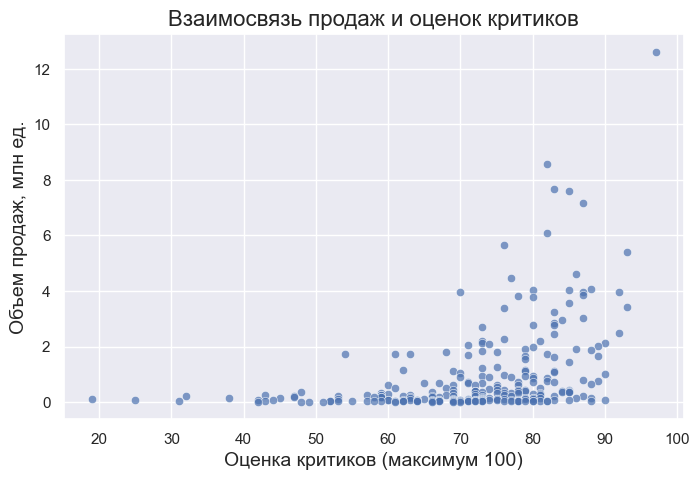

In [24]:
#зададим размер графика, где 8 - это width, 5 - height
sns.set(rc = {'figure.figsize':(8 , 5)})

#построим диаграмму рассеяния для critic_score
scatterplot = sns.scatterplot(
    data = df_actual.query('platform == "PS4"'),
    x = 'critic_score',
    y = 'total_sales',
    alpha = 0.7
)

#зададим наименование полученного графика (scatterplot.axes.set_title)
#и подписи осей (scatterplot.set_xlabel, scatterplot.set_ylabel) 
scatterplot.axes.set_title("Взаимосвязь продаж и оценок критиков", fontsize=16)
scatterplot.set_xlabel("Оценка критиков (максимум 100)", fontsize=14)
scatterplot.set_ylabel("Объем продаж, млн ед.", fontsize=14);

На диаграмме можно заметить, что:
- продажи появляются все чаще, когда оценка критиков превышает значение 40;
- следующий существенный рост не только по встречаемости количества продаж, но и по росту объема продаж какой-либо копии игры можно проследить свыше оценки со значением 60;
- объем продаж свыше 2 млн ед. проданных копий наблюдается тогда, когда и оценка критиков больше 70.

Хочется рассмотреть приближенно полученную диаграмму, чтобы рассмотреть значения ближе к нулю, скорее всего, туда как раз попало большинство наших медианных значений (0,2 млн ед. в среднем), выведем диаграмму, где объем продаж будет меньше 2 млн ед.:

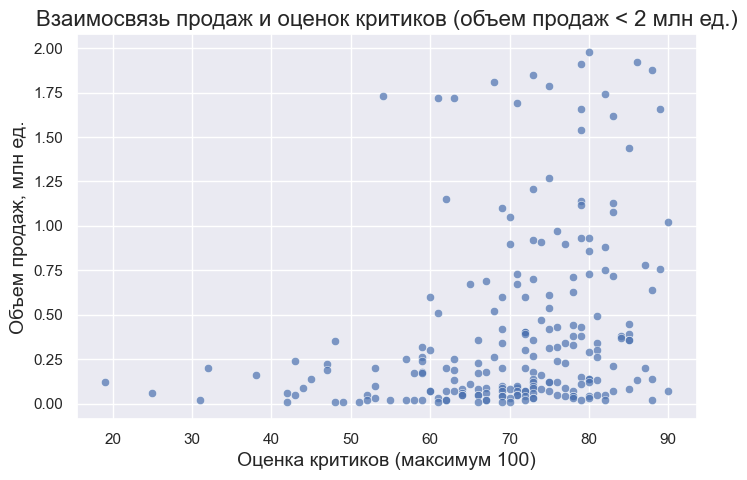

In [25]:
#зададим размер графика, где 8 - это width, 5 - height
sns.set(rc = {'figure.figsize':(8 , 5)})

#построим диаграмму рассеяния для critic_score при total_sales < 2
scatterplot = sns.scatterplot(
    data = df_actual.query('platform == "PS4" & total_sales < 2'),
    x = 'critic_score',
    y = 'total_sales',
    alpha = 0.7
)

#зададим наименование полученного графика (scatterplot.axes.set_title)
#и подписи осей (scatterplot.set_xlabel, scatterplot.set_ylabel) 
scatterplot.axes.set_title("Взаимосвязь продаж и оценок критиков (объем продаж < 2 млн ед.)", fontsize=16)
scatterplot.set_xlabel("Оценка критиков (максимум 100)", fontsize=14)
scatterplot.set_ylabel("Объем продаж, млн ед.", fontsize=14);

Да, и тут мы тоже видим, что объемы продаж тем больше, чем выше оценка критиков.

Рассмотрим теперь взаимосвязь объема продаж и оценок пользователей.

Сперва вспомним, что в оценке пользователей было такое значение как "tbd", которую по сути для нас несет пропущенное значение.

Посмотрим сможем ли мы пользоваться в последующем анализе взаимосвязи объема продаж и оценок пользователей/критиков новым датафреймом, в котором будут отсутствовать строки со значениями "tbd" столбца user_score.

Для этого посмотрим как соотносятся эти значения со значениями в столбце critic_score:

In [26]:
#выведем сколько значений рейтинга критиков имеетс в наличии, когда рейтинг пользователей равен "tbd"
print('Количество заполненных значений с оценкой критиков, при условии, что оценка пользователей \
принимает значение tbd, равно', df_actual.query('user_score == "tbd"')['critic_score'].count(), '.')

#выведем также сколько пропущенных значений в столбце critic_score, когда user_score == "tbd"
print('Количество пропущенных значений в столбце с оценкой критиков, при условии, что оценка пользователей \
принимает значение tbd, равно', df_actual.query('user_score == "tbd"')['critic_score'].isna().sum(), '.')

Количество заполненных значений с оценкой критиков, при условии, что оценка пользователей принимает значение tbd, равно 12 .
Количество пропущенных значений в столбце с оценкой критиков, при условии, что оценка пользователей принимает значение tbd, равно 120 .


In [27]:
#посмотрим сколько всего строк в столбце critic_score без пропущенных значений
f'Общее количество строк в critic_score (без пропущенных значений) равно {df_actual["critic_score"].count()}'

'Общее количество строк в critic_score (без пропущенных значений) равно 1312'

Т.о. если мы удалим 12 строк из 1312 - это составит менее 1 % потерь данных в столбце critic_score, что в принципе допустимо.

Значит, так и сделаем и для дальнейшего анализа будем использовать этот датафрейм:

In [28]:
#сохраним в новую переменную df_actual_no_tbd все строки, где в столбце с user_score не встречается значение 'tbd'
df_actual_no_tbd = df_actual.query('user_score != "tbd"')

#переведем столбец 'user_score' в тип данных float
df_actual_no_tbd['user_score'] = df_actual_no_tbd['user_score'].astype('float')

Возвращаемся к псотроению графика корреляции объема продаж и оценки пользователей:

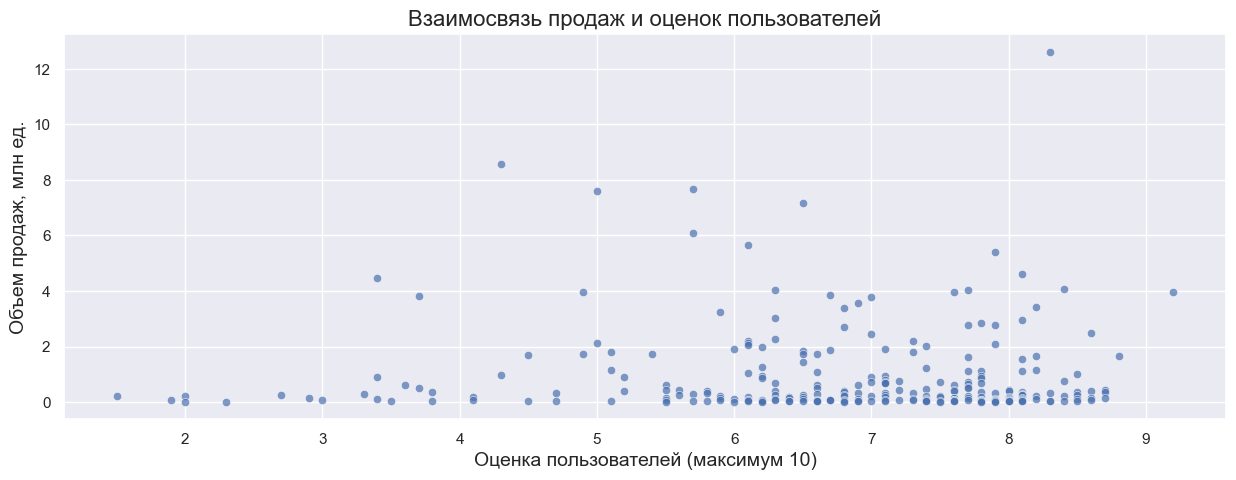

In [29]:
#зададим размер графика, где 8 - это width, 5 - height
sns.set(rc = {'figure.figsize':(15 , 5)})

#построим диаграмму рассеяния для столбца 'user_score' датафрейма df_actual_no_tbd
scatterplot = sns.scatterplot(
    data = df_actual_no_tbd.query('platform == "PS4"'),
    x = 'user_score',
    y = 'total_sales',
    alpha = 0.7
)

#зададим наименование полученного графика (scatterplot.axes.set_title)
#и подписи осей (scatterplot.set_xlabel, scatterplot.set_ylabel) 
scatterplot.axes.set_title("Взаимосвязь продаж и оценок пользователей", fontsize=16)
scatterplot.set_xlabel("Оценка пользователей (максимум 10)", fontsize=14)
scatterplot.set_ylabel("Объем продаж, млн ед.", fontsize=14);

На данном графике можно проследить ту же взаимосвязь объема продаж от оценки пользователей, что и от оценки критиков (хоть и не также усиленно выраженную):
- покупки учащаются на игры с более высокой оценкой пользователей;
- высокий уровень объема продаж той или иной игры встречается, как правило, при высокой оценке пользователей (свыше значения 5,5).

Посчитаем значение коэффициента корреляции объема продаж и оценки критиков и оценки пользователей:

In [30]:
df_actual_no_tbd.loc[
    df_actual_no_tbd['platform'] == 'PS4',
    ['critic_score', 'user_score', 'total_sales']
].corr()['total_sales']

critic_score    0.41
user_score     -0.03
total_sales     1.00
Name: total_sales, dtype: float64

Коэффициенты корреляции немного меняют взгляд на картину и говорят о том, что взаимосвязь продаж с оценкой критиков - средняя, но она есть и она линейная (коэффициент корреляции равен 0,41). А вот взаимосвязь с оценкой пользователей можно сказать, вовсе отсутствует, при этом она орицательная - это видно из коэффициента корреляции (-0,03), при этом на графике это было довольно сложно распознать.

**Выводы:**

Исходя из графиков и полученных коэффициентов корреляции можно проследить прямую линейную взаимосвязь между объемами продаж и оценкой критиков (чем выше оценка, тем больше объем продаж и игры с более высоким рейтингом чаще продаются).

С оценкой пользователей такая взаимосвязь не прослеживается, она очень низкая почти нету и более того, принимает обратное значение, т.е. не всегда размер продаж выше, если оценка пользоватлей высока.

Т.е. можно сказать, что для продаж игр более значима оценка критиков.

#### Посмотрим как обстоят дела на других платформах.

Построим аналогичные графики корреляции объема продаж и оценки критиков/пользователей для остальных перспективных платформ:

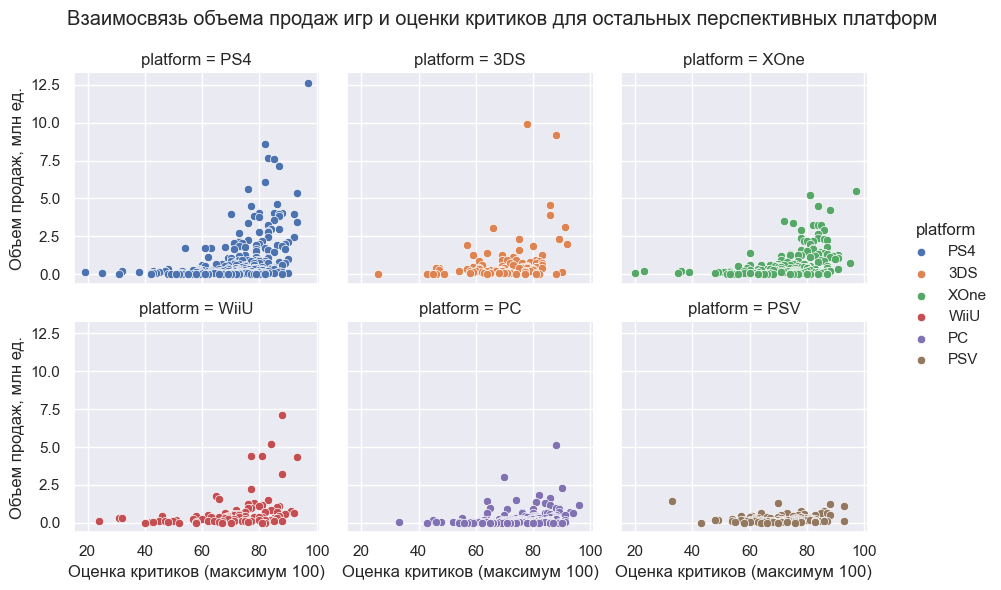

In [31]:
#построим диаграммы рассеяния для всех перспективных платформ (@perspective) по взаимосвязи: "critic_score" и "total_sales"
#для этого воспользуемся объектом FacetGrid по ограниченному датафрейму,
#взяв только перспективные платформы ('platform == @perspective'), передадим col наименование каждой из перспективных платформ,
#параметр hue даст для каждого полученного графика свой оттенок, в col_wrap зададим максимальное кол-во графиков в строке
critic_scatter = sns.FacetGrid(df_actual_no_tbd.query('platform == @perspective'), col="platform", hue="platform", col_wrap=3)

#методом map() подготовим сетки. Тип диаграммы передаем в первом аргументе - sns.scatterplot,
#в качестве осей будут x - "critic_score", y - "total_sales"
critic_scatter.map(sns.scatterplot, "critic_score", "total_sales")

#добавим легенду
critic_scatter.add_legend()

#зададим заголовок и подпишем оси
critic_scatter.fig.suptitle("Взаимосвязь объема продаж игр и оценки критиков для остальных перспективных платформ")
critic_scatter.set_ylabels("Объем продаж, млн ед.")
critic_scatter.set_xlabels("Оценка критиков (максимум 100)")

#разместим подписи так, чтобы они не перекрывали друг друга
critic_scatter.tight_layout();

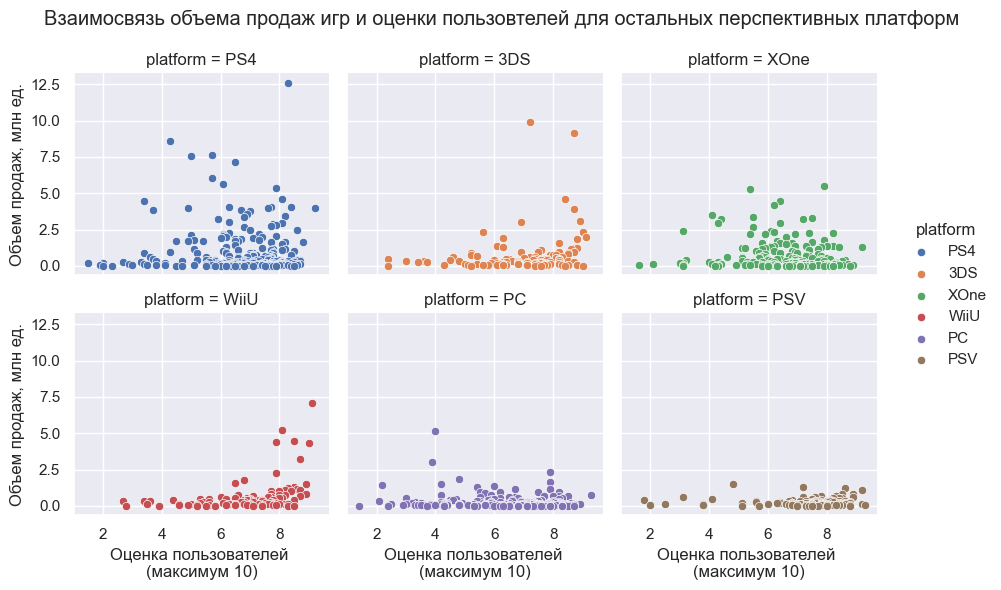

In [32]:
#тут сделаем аналогичному тому, что выше только проследим взаимосвязь с user_score
user_scatter = sns.FacetGrid(df_actual_no_tbd.query('platform == @perspective'), col="platform", hue="platform", col_wrap=3)
user_scatter.map(sns.scatterplot, "user_score", "total_sales")

#добавим легенду
user_scatter.add_legend()

#зададим заголовок и подпишем оси
user_scatter.fig.suptitle("Взаимосвязь объема продаж игр и оценки пользовтелей для остальных перспективных платформ")
user_scatter.set_ylabels("Объем продаж, млн ед.")
user_scatter.set_xlabels("Оценка пользователей \n(максимум 10)")

#разместим подписи так, чтобы они не перекрывали друг друга
user_scatter.tight_layout();

In [33]:
#выведем коэффициенты корреляции для полученных графиков
df_actual_no_tbd.query('platform == @perspective').groupby('platform')['platform','critic_score','user_score','total_sales'].corr()['total_sales']

platform              
3DS       critic_score    0.31
          user_score      0.20
          total_sales     1.00
PC        critic_score    0.24
          user_score     -0.12
          total_sales     1.00
PS4       critic_score    0.41
          user_score     -0.03
          total_sales     1.00
PSV       critic_score    0.09
          user_score     -0.00
          total_sales     1.00
WiiU      critic_score    0.35
          user_score      0.40
          total_sales     1.00
XOne      critic_score    0.41
          user_score     -0.07
          total_sales     1.00
Name: total_sales, dtype: float64

**Выводы:**

В общем картина аналогичная той, что была описана выше для PS4: у рейтинга критигов сильнее взаимосвязь с объемом продаж, чем у рейтинга пользователей, можно даже сказать, что рейтинг пользователей почти не оказывает влияние на продажи. Также с рейтингом критиков типична прямая взаимосвязь, с рейтингом пользователей - обратная (отрицательная).

Но есть и некоторые особенности:
- у двух платформ 3DS и WiiU оценка пользователей также важна. Как оказалось эти две платформы являются продуктами компании Nintendo (японская компания, специализирующаяся на создании видеоигр и игровых систем). Возможно, это некоторая особенность продаж именно этих игр, что покупатели таких игр обращаются как к оценке критиков, так и к оценке пользователей;
- еще интересно отметить, что для игровой платформы PSV ни оценка критиков, ни оценка пользователей почти не имеет влияние на объем продаж;
- очень похожая картина взаимосвязей у платформ PS4 и XOne, которые мы ранее отмечали как те, которые только набирают обороты продаж и будут эффективны еще пару лет.

#### Рассмотрим общее распределение игр по жанрам. 
<a id="game_genre"></a> 

Построим круговую диаграмму, чтобы посмотреть какой жанр какую долю занимает на исследуемом рынке:

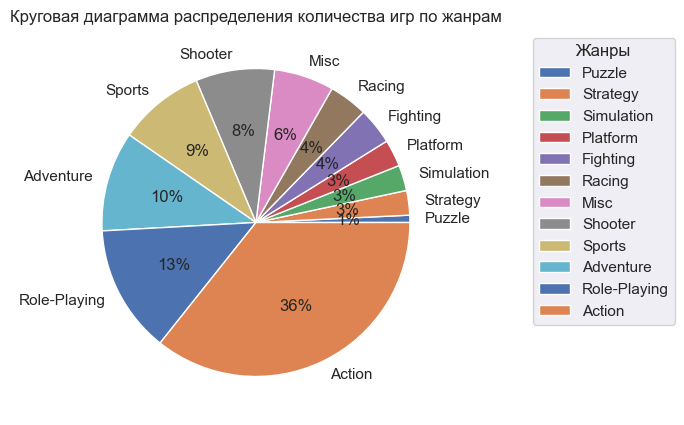

In [34]:
#построим круговую диаграмму распредления игр по жанрам, сгруппировав датафрейм по жанрам (groupby('genre')
#и посчитав их количество (count()), выведем долю (autopct) каждого жанра
df_actual_no_tbd.groupby('genre')['genre'].count().sort_values().plot(
    kind='pie',
    y='genre',
    autopct='%1.0f%%'
)

#задададим наименование графика
plt.title("Круговая диаграмма распределения количества игр по жанрам")

#добавим легенду, задав параметры ее размещения относительно графика и заголовок
plt.legend(bbox_to_anchor=(1.2,1), title='Жанры')
plt.ylabel("");

Можно сделать вывод, что большую долю рынка занимает жанр Action - 36%, на 2-м месте - Role-Playing (ролевые игры или РПГ) - 13%, на 3-м - Adventure (приключенческие) - 10%. Каждый из остальных жанров составляют меньше 10% на рынке.

Посмотрим какие из жанров самые прибыльные (правда без стоимости, но хотя бы по количеству проданных копий).

Т.к. за высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами, лучше найти жанр, где игры стабильно приносят высокий доход - для этого рассмотрим медианные значения:

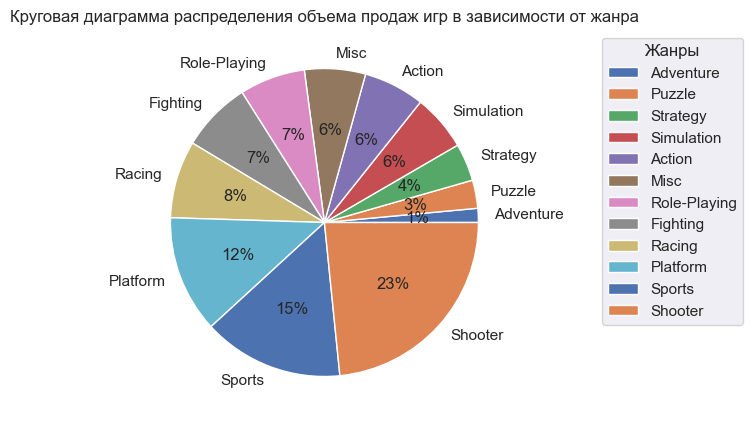

In [35]:
#построим круговую диаграмму продаж игр по жанрам, сгруппировав датафрейм по жанрам (groupby('genre')
#и посчитав медианный объем продаж того или иного жанра (['total_sales'].median()),
#выведем долю продаж (autopct) каждого жанра
df_actual_no_tbd.groupby('genre')['total_sales'].median().sort_values().plot(
    kind='pie',
    y='genre',
    autopct='%1.0f%%'
)

#задададим наименование графика
plt.title("Круговая диаграмма распределения объема продаж игр в зависимости от жанра")

#добавим легенду, задав параметры ее размещения относительно графика и заголовок
plt.legend(bbox_to_anchor=(1.2,1), title='Жанры')
plt.ylabel("");

По количеству проданных копий, стабильно приносящих доход лидирует жанр Shooter - 23%.

На 2-м месте уже Sports (спортивные симуляторы) - 15%, и на 3-м Platform (платформер) - 12%.
    
Доля продаж каждого остального из оставшихся жаров - меньше 10%.
    
Не смотря на то, что больше разработок игр с жанрами Action, Role-Playing и Adventure, самими стабильно продаваемыми считаются Shooter, Sports и Platform.
    
Жанры, которые выпускаются чаще других (Action, Role-Playing и Adventure) занимают малую долю стабильных! продаж. Можно предположить, что эти игры выпускаются чаще, т.к. они имеют сюжетный ход игры и пройдя ее раз, пользователю уже не хочется еще раз ее проходить, т.к. путь игры довольно долгий.
    
А вот игры с жанрами Shooter, Sports и Platform - это те игры, которые пользователь всегда может включить на досуге и поиграть, в т.ч. компанией. В таких играх сюжет, как правило, отсутствует.

### Портреты пользователей для каждого региона.
<a id="user_portrait"></a> 

#### Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5):

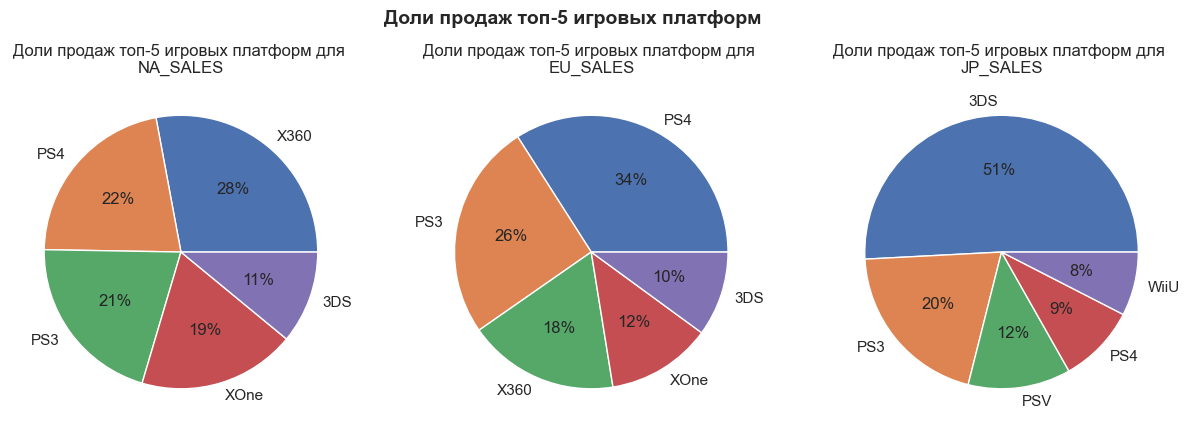

In [36]:
#создадим цикл, который пройдется по продажам в каждой стране и отобразит в круговых диаграммах топ 5 самых популярных платформ
#(расположены в порядке убывания против часовой стрелки от наибольшего значения)

#создаем список стран для которых будет строиться диаграмма
countries = ['na_sales', 'eu_sales', 'jp_sales']

#создаем фигуру и подграфики в ряд
fig, axs = plt.subplots(1, len(countries), figsize=(15, 5), sharey=True)

#для каждой страны строим круговую диаграмму
for i, country in enumerate(countries):
    platform_sales = df_actual_no_tbd.pivot_table(
        index='platform',
        values=country,
        aggfunc='sum'
    ).sort_values(by=country, ascending=False).head()

    #строим круговую диаграмму на i-м подграфике
    axs[i].pie(
        platform_sales[country],
        labels=platform_sales.index,
        autopct='%1.f%%'
    )
    
    #устанавливаем заголовок для i-го подграфика
    axs[i].set(title=f'Доли продаж топ-5 игровых платформ для \n{country.upper()}', ylabel='', aspect='equal')
    
#зазадим общий заголовок для всех графиков
fig.suptitle('Доли продаж топ-5 игровых платформ', fontsize=14, fontweight='bold');

In [37]:
platform_sales

,jp_sales
platform,
3DS,87.68
PS3,34.92
PSV,20.93
PS4,15.96
WiiU,13.01


Наибольшей популярностью у пользователей каждого из рассматриваемых регионов пользуются разные игровые платформы. Так в Северной Америке предпочитают больше всего X360 (20% рынка), в Европе - PS4 (34%), в Японии - 3DS (51%).

Причем стоит отметит, что в Японии в топ-5 не входят продажи игр от платформ, являющимися учредителями других стран (например, отсутствует популярная платформа XOne, выпущенная компанией Microsoft, США). Все платформы, входящие в топ-5 были выпущены в Японии.

Также можно сказать, что в Северной Америке доли рынка между 5 платформами распредлены более менее равномерно, в Европе почти что также, но все же большую долю (60%) занимают платформы серии PlayStation.

В Японии явно выделяется 3DS - занимает 51% доли рынка из топ-п платформ.

#### Рассмотрим популярные жанры (топ-5) в каждом из рассматриваемых регионов:

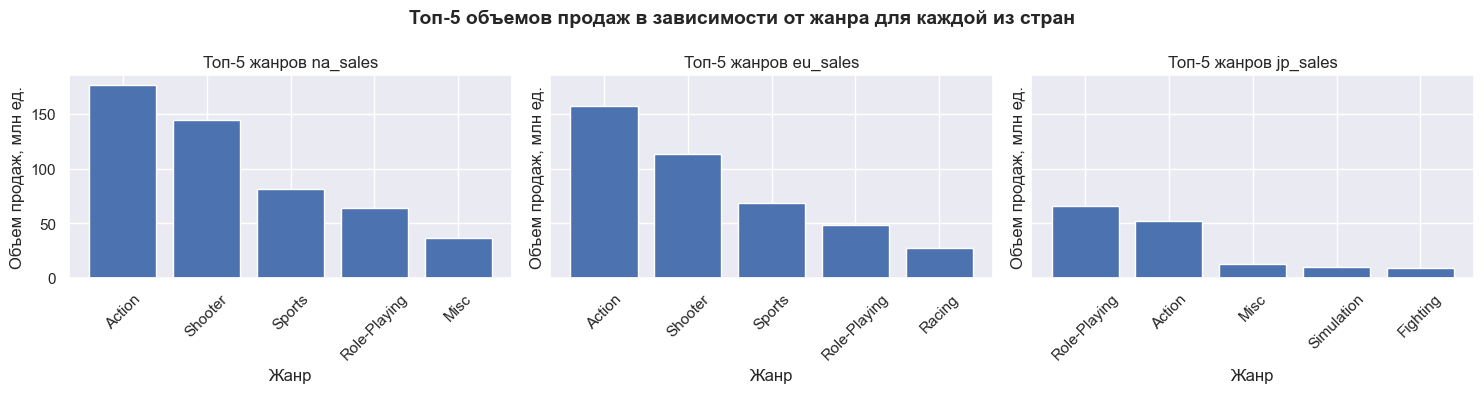

In [38]:
#создаем список стран для которых будет строиться диаграмма
countries = ['na_sales', 'eu_sales', 'jp_sales']

#создаем фигуру и подграфики в ряд
fig, axs = plt.subplots(1, len(countries), figsize=(15,4), sharey=True)

#создадим цикл, который пройдется по продажам в каждой стране и отобразит
#в столбчатых диаграммах топ 5 самых продаваемых жанров
for i, country in enumerate(countries):
    genre_sales = df_actual_no_tbd.pivot_table(
        index = 'genre',
        values = country,
        aggfunc = 'sum'
    ).sort_values(by = country, ascending = False).head()
    
    #строим столбчатую диаграмму на i-м подграфике
    axs[i].bar(
        genre_sales.index,
        genre_sales[country]
    )
    
    #устанавливаем заголовок для i-го подграфика и подписи осей  
    axs[i].set(
        title=f'Топ-5 жанров {country}',
        xlabel='Жанр',
        ylabel='Объем продаж, млн ед.' 
    )
    
    #разворачиваем подписи оси X на 45 градусов
    axs[i].tick_params(axis='x', rotation=45)

#задаем общий заголовое для всех 3-х графиков
fig.suptitle('Топ-5 объемов продаж в зависимости от жанра для каждой из стран', fontsize=14, fontweight='bold')

#размещаем графики так, чтобы подписи не пересикались
fig.tight_layout();

In [39]:
df_actual_no_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [40]:
genre_sales

,jp_sales
genre,
Role-Playing,65.44
Action,52.33
Misc,12.86
Simulation,10.35
Fighting,9.41


Из полученных графиков можно сделать вывод, во всех трех регионах точно популярен жанр игр Action.

Причем в странах Северной Америки и Европы указанный выше жанр занимает 1-е место, а 2-е - Shooter, далее у обоих в порядке снижения уровня популярности идут Sports и Role-Playing (РПГ). Причиной такой одинковости в рейтинге жанров можно предположить схожестью культур указанных регионов.

В Японии жанр Role-Playing занимает 1-е место. Есть 2 предположения почему именно этот жанр наиболее популярен:
- национальная особенность - жителям данных стран, например, по темпераменту больше подходит этот стиль игры: это игра от первого лица с множеством подфункций и часто в различных разветвлениях в сюжетах;
- платформа 3DS, занимающая по популярности большую часть рынка, выпускает больше именно такого жанра игры, но это нужно проверять.
Жанр Action в Японии занимает 2-е место, остальные жанры (3DS), даже в топ-5 для Японии не столь примечательны и где-то в 3 раза ниже по уровню распространенности, чем те которые занимают 1 и 2-е места.

#### Рассмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Сперва рассмотрим какие есть уникальные значения у данного рейтинга:

In [41]:
#выведем уникальные значения столбца rating
df_actual_no_tbd['rating'].unique()

array(['M', nan, 'E', 'E10+', 'T'], dtype=object)

ESRB (англ. Entertainment Software Rating Board) - это ассоциация, которая определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Кратко опишем, что означает каждая из категорий:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам» (игра подходит для лиц от 13 лет)
- «M» («Mature») — «Для взрослых» (материалы игры не подходят для лиц младше 17 лет).
  
Каждый из рейтингов мы описали, теперь нужно заполнить пропуски, т.к. эти данные нам тоже нужны. Присвоим каждому пропуску значение "no_rating":

In [42]:
#заменим пропуски на 'no_rating' (fillna('no_rating'))
df_actual_no_tbd['rating'] = df_actual_no_tbd['rating'].fillna('no_rating')

#и снова выведем уникальные значения столбца rating для проверки
df_actual_no_tbd['rating'].unique()

array(['M', 'no_rating', 'E', 'E10+', 'T'], dtype=object)

Теперь посчитаем для каждого из регионов чему равен объем продаж (в долях) для каждой категории рейтинга:

In [43]:
#создадим сводную таблицу по рейтингам (index = 'rating')
#и объему продаж (aggfunc = 'sum') в каждом из регионов (values = ['na_sales', 'eu_sales', 'jp_sales']), а также выведем
#промежуточные итоги (margins = True) и сразу же для наглядности выведем долю каждого из полученных значений
df_actual_no_tbd.pivot_table(
    index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales'],
    aggfunc = 'sum'
).apply(lambda x: x/x.sum())

,eu_sales,jp_sales,na_sales
rating,,,
E,0.22,0.15,0.19
E10+,0.10,0.04,0.12
M,0.39,0.11,0.39
T,0.11,0.13,0.11
no_rating,0.18,0.57,0.18


Видно, что снова картина в странах Европы и Северной Америки очень схожа - доли продаж по каждому из рейтингов приблизительно одинаковы: много продаж для игр с пометкой "Для взрослых" (39%), далее чуть меньше доли игр с категорией "Для всех" (22% и 19%), затем, почти в равной степени распределена доля игр "Подросткам" и "Для всех от 10 лет и старше" (10-12%). При этом доля игр, которым рейтинг не присвоен, составляет 18% в обоих регионах. Т.е. таким образом можно сказать, что рейтинг в указанных регионах играет свою роль и доля продаж игр без рейтинга невелика.

В Японии кардинально другая картина: доля продаж по категориям с рейтингом очень низкая и на каждую такую категорию приходится до 15%, а львиную долю занимают продажи без рейтинга - 57%! Это свидельствует, что для жителей Японии не так важна ориентации на возрастной рейтинг при покупке игр.

**Выводы:**

В странах Европы наиболее популярная платформа PS4, в Северной Америке - X360, в Японии - 3DS. Причем в Японии в топ-5 самых популярных платформ не входит ни одна платформа, созданная зарубежом.

И в Европе и в Севрной Америке наиболее распространены такие жанры игр как Action и Shooter, в Японии - Role-Playing. Возможно, это национальные особенности жителей той или иной страны.
    
Рейтинг ESRB играет существенную роль в распредлении продаж в зависимости от возрастного ценза в странах Европы и Северной Америки. В Японии данный рейтинг не имеет никакого влияния.

### Проверка гипотез.
<a id="hypothesis"></a> 

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:

Проверка гипотез начинается с определения нулевой гипотезы (H_0), которая формулируется всегда так, чтобы использовать знак равенства:
```
H_0: Средние пользовательские рейтинги (user_score) платформ "XOne" и "PC" равны.
```
Исходя из H_0 формулируется альтернативная гипотеза (H_a) - это утверждение, которое принимается верным, если отбрасывается H_0.
```
H_a: Средние пользовательские рейтинги (user_score) платформ "XOne" и "PC" не равны
```
Такая альтернативная гипотеза называется "двусторонней", потому что есть возможное отклонение и в большую, и в меньшую сторону.

Зададим доверительный интервал, который обычно называют альфа (α, alpha). Типичное значение альфа составляет 0,05. Это утверждение подразумевает, что достоверность результатов теста составляет 95%:
```
alpha = 0.05
```
Если вероятность получить наблюдаемый или еще более далекий от предполагаемого результат при условии, что H_0 верна, (p-value) меньше значения альфа (или меньше 5%), то H_0 отвергается. В обратном случае - H_0 отвергнуть не получилось.

Перед проверкой гипотезы подготовим данные без пропусков в столбце с оценкой пользователей:

In [44]:
#создадим переменную и положим в нее датафрейм, в котором не будет пропусков в столбце 'user_score'
df_user_score_clean = df_actual_no_tbd.dropna(subset = ['user_score'])

#проверим есть пропуски в столбце 'user_score' нового датасета
print('Количество пропусков в столбце "user_score" равно', df_user_score_clean['user_score'].isna().sum())

#выведем первые 5 строк полученного DF для проверки, что получился датасет
df_user_score_clean.head()

Количество пропусков в столбце "user_score" равно 0


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.00,8.20,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.00,8.10,M,16.27
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.00,5.30,M,13.79
5,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.00,4.80,M,13.68
6,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62


Отлично, от попусков избавились, переходим к самой проверке:

In [45]:
# results = вызов метода для проверки гипотезы о равенстве средних двух генереальных совокупностей по взятым из них выборкам
results = st.ttest_ind(df_user_score_clean.query('platform == "XOne"')['user_score'],
                       df_user_score_clean.query('platform == "PC"')['user_score'],
                       equal_var = False)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


p-value получилось очень высоким. Значит действительно - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные:

Следуя логике, указанной в описании при составлении предыдущей гипотезы, запишем H_0 и H_a для текущей проверки:
```
H_0: Средние пользовательские рейтинги жанров Action и Sports равны.
H_a: Средние пользовательские рейтинги жанров Action и Sports не равны.
alpha = 0.05
```

Проверим записанные гипотезы:

In [46]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(df_user_score_clean.query('genre == "Action"')['user_score'],
                       df_user_score_clean.query('genre == "Sports"')['user_score'],
                       equal_var = False)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

4.24307776572644e-20
Отвергаем нулевую гипотезу


Данный результат подтверждается и общими наблюдениями в процессе анализа: жанр Action, как правило, всегда лидировал при рассмотрении распределения объема продаж, по жанрам, чего совершенно не скажешь о жанре Sports.

**Выводы:**
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action и Sports не равны.

### Общий вывод.
<a id="conclusion"></a> 
**В этоим исследовании мы:**
- рассмотрели данные в первоначальном виде и выявили какие данные стоит преобразовать, обратить на них внимание
- сделали предобработку данных:
```
 - удалили строки с пропусками, которые ни на что значительно не повлияли;
 - изменили типы данных там, где это требуется;
 - проанализировали почему не стоит те или иные пустые значения заполнять срудними или медианными.
```
- посчитали суммарные продажи по всем регионам
- провели исследовательский анализ данных, который в себя включал:
```
 - провели анализ сколько игр выпускалось в те или иные годы;
 - выбрали платформы с наибольшими суммарными продажами и посмотрели как продажи менялись по годам, а также выявили за какой типичный срок появляются новые и исчезают старые платформы;
 - в рамках актуального периода для исследования выбрали наиболее перспективные платформы на ближайшее время;
 - рассмотрели как влияют на продажи той или иной платформы пользовательские оценки и оценки критиков;
 - выявили наиболее прибыльные жанры, а также типичные жанры которые пользуются успехом и те, которые нет.
```
- составили портерт пользователя для каждого из рассматриваемых регионов (Северная Америка, Европа, Япония):
```
 - определили для каждого региона наиболее популярные платформы и жанры;
 - проанализировали влияет ли на продажи в кадлом из регионов рейтинг ERSB (ассоциация, которая определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию).
```
- осуществили проверку гипотез:
```
 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - средние пользовательские рейтинги жанров Action и Sports разные.
```
 
 **И пришли к следующим выводам:**
 1. В рассматриваемом периоде, начиная с 1980 г. по 2016 г. пик выпуска игр приходится на 2008 и 2009 гг. (свыше 1 400 игр в каждом указанном году). Некоторая стагнация была достигнута в 2012 г. с тех пор количество выпускаемых игр в год составляет в районе 600 шт.
```
``` 
 2. За весь рассматриваемый период платформами с самыми высокими объемами продаж являлись PS2, X360, PS3, Wii, DS, PS - это можно учесть при определении перспектвных платформ в актуальном периоде.
```
``` 
 3. Выявили, что в среднем "жизненный цикл" успешной! игровой платформы составляет от 10 до 12 лет с объемом продаж на пике в районе от 150 до 200 млн ед. проданных копий.
```
``` 
 4. Выявили, что в актуальном периоде (с 2012 по 2016 гг.) самыми перспективными платформами являются PS4 и XOne, что также дополнительно подтверждается выводами из п. 2 (PS4 (новое поколение) - относится к ранее успешным платформам PS2, PS3, PS (старое поколение), XOne (новое поколение) -  относится к ранее успешной платформе X360 (старое поколение)).
```
``` 
 5. Менее перспективными по причине того, что, скорее всего, пик их продаж уже прошел и продажи пошли на спад, но еще пару-тройку лет будут приносить прибыль, являются платформы 3DS, WiiU, PC и PSV, и все они тоже (кроме PC) коррелируют с успешными компаниями только старого поколения (см. п. 2).
```
``` 
 6. Влияние оценки критиков играет свою роль на количество проданных копий той или иной игры - чем выше оценка, тем больше продаж. При этом оценка пользователей, почти не влияет на продажи (как правило, очень низкая и незначительная корреляция). Но есть пара исключений по платформам: у платформ Японской компании Nintendo (3DS и WiiU) оценка пользователей также оказалась важна, как и оценка критиков. А вот у платформы PSV ни те, ни другие оценки почти не оказывают никакого влияния.
```
```     
 7. Наиболее распространенными выпускаемыми жанрами являются Action, Role-Playing, Adventure. При этом наиболее стабильно приносящими высокий доход - Shooter, Sports и Platform.
```
``` 
 8. В Европе наиболее популярная игровая платформа PS4, в Северной Америке - X360, в Японии - 3DS. Причем в Японии в топ-5 самых популярных платформ не входит ни одна платформа, созданная зарубежом.
```
``` 
 9. И в Европе и в Севрной Америке наиболее распространены такие жанры игр как Action и Shooter, в Японии - Role-Playing. 

```
```     
 10. Рейтинг ESRB влияет на объем продаж той или иной категории указанного рейтинга в старанах Европы и Северной Америки. В Японии данный рейтинг не оказывает существенного влияния на распределение продаж в зависимости от возрастного ценза. 
```
``` 
 11. На основании метода проверки гипотез выявлено следющее:
 
    ```
     - средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
     - средние пользовательские рейтинги жанров Action и Sports разные.
    ```
    
**Общие рекомендации:**

При планировании на какую платформу сделать ставку, чтобы получить как можно больше прибыли, лучше выбирать среди сперва - PS4 и XOne, затем уже среди 3DS, WiiU, PC и PSV.

При этом не стоит забывать территориалный признак, т.к. PS4 больше распространен среди жителей Европы, XOne (или X360) - в Северной Америке, 3DS - в Японии.

Также не стоит забывать о жанрах игр тоже отталкиваясь от признака "в какой стране будет продаваться игра", т.к. в Европе и Северной Америке предпочитают больше активные и шутеры, где ставка идет на реакцию геймера, а в Японии - РПГ да и вообще более спокойные/размеренные с постепенным прокачиванием навыка персонажа.
    
Плюс можно учесть жанры игр, которые имеют свойство приносить стабильно высокий доход - Shooter, Sports и Platform.